<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Evaluating Classification Models on Humor Styles Data

---

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Humor Styles" survey.

This survey is designed to evaluate what "style" of humor subjects have. Your goal will be to classify gender using the responses on the survey.

### Humor styles questions encoding reference

### 32 questions:

Subjects answered **32** different questions outlined below:

    1. I usually don't laugh or joke with other people.
    2. If I feel depressed, I can cheer myself up with humor.
    3. If someone makes a mistake, I will tease them about it.
    4. I let people laugh at me or make fun of me at my expense more than I should.
    5. I don't have to work very hard to make other people laugh. I am a naturally humorous person.
    6. Even when I'm alone, I am often amused by the absurdities of life.
    7. People are never offended or hurt by my sense of humor.
    8. I will often get carried away in putting myself down if it makes family or friends laugh.
    9. I rarely make other people laugh by telling funny stories about myself.
    10. If I am feeling upset or unhappy I usually try to think of something funny about the situation to make myself feel better.
    11. When telling jokes or saying funny things, I am usually not concerned about how other people are taking it.
    12. I often try to make people like or accept me more by saying something funny about my own weaknesses, blunders, or faults.
    13. I laugh and joke a lot with my closest friends.
    14. My humorous outlook on life keeps me from getting overly upset or depressed about things.
    15. I do not like it when people use humor as a way of criticizing or putting someone down.
    16. I don't often say funny things to put myself down.
    17. I usually don't like to tell jokes or amuse people.
    18. If I'm by myself and I'm feeling unhappy, I make an effort to think of something funny to cheer myself up.
    19. Sometimes I think of something that is so funny that I can't stop myself from saying it, even if it is not appropriate for the situation.
    20. I often go overboard in putting myself down when I am making jokes or trying to be funny.
    21. I enjoy making people laugh.
    22. If I am feeling sad or upset, I usually lose my sense of humor.
    23. I never participate in laughing at others even if all my friends are doing it.
    24. When I am with friends or family, I often seem to be the one that other people make fun of or joke about.
    25. I donít often joke around with my friends.
    26. It is my experience that thinking about some amusing aspect of a situation is often a very effective way of coping with problems.
    27. If I don't like someone, I often use humor or teasing to put them down.
    28. If I am having problems or feeling unhappy, I often cover it up by joking around, so that even my closest friends don't know how I really feel.
    29. I usually can't think of witty things to say when I'm with other people.
    30. I don't need to be with other people to feel amused. I can usually find things to laugh about even when I'm by myself.
    31. Even if something is really funny to me, I will not laugh or joke about it if someone will be offended.
    32. Letting others laugh at me is my way of keeping my friends and family in good spirits.

---

### Response scale:

For each question, there are 5 possible response codes ("likert scale") that correspond to different answers. There is also a code that indicates there is no response for that subject.

    1 == "Never or very rarely true"
    2 == "Rarely true"
    3 == "Sometimes true"
    4 == "Often true"
    5 == "Very often or always true
    [-1 == Did not select an answer]
    
---

### Demographics:

    age: entered as as text then parsed to an interger.
    gender: chosen from drop down list (1=male, 2=female, 3=other, 0=declined)
    accuracy: How accurate they thought their answers were on a scale from 0 to 100, answers were entered as text and parsed to an integer. They were instructed to enter a 0 if they did not want to be included in research.	

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

### 1. Load the data and perform any EDA and cleaning you think is necessary.

It is worth reading over the description of the data columns above for this.

In [2]:
hsq = pd.read_csv('./hsq_data.csv')

In [3]:
# correct spelling
hsq.rename(columns={'agressive':'aggressive'}, inplace=True)

In [4]:
hsq.shape

(1071, 39)

In [5]:
# looks like there are 4 genders but most are just male and female
print hsq.gender.unique()
print hsq.gender.value_counts()

[2 1 3 0]
1    581
2    477
3      8
0      5
Name: gender, dtype: int64


In [6]:
hsq.head(2)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90


In [7]:
# Set any of the -1 values in the question answers to np.nan
for col in [c for c in hsq.columns if c.startswith('Q')]:
    hsq[col] = hsq[col].map(lambda x: np.nan if x == -1 else x)

In [8]:
# check null values:
hsq.isnull().sum()

Q1                3
Q2                3
Q3                2
Q4                1
Q5                2
Q6                2
Q7                2
Q8                7
Q9                4
Q10               3
Q11               2
Q12               2
Q13               2
Q14               4
Q15               7
Q16               5
Q17              13
Q18               6
Q19               4
Q20               6
Q21               8
Q22               7
Q23               8
Q24               7
Q25              10
Q26               9
Q27               5
Q28               4
Q29               6
Q30               8
Q31               7
Q32               3
affiliative       0
selfenhancing     0
aggressive        0
selfdefeating     0
age               0
gender            0
accuracy          0
dtype: int64

In [9]:
# drop the nulls
hsq.dropna(inplace=True)
print hsq.shape

(993, 39)


In [10]:
hsq.age.unique()

array([   25,    44,    50,    52,    30,    27,    34,    18,    33,
          26,    36,    21,    20,    23,    70,    17,    39,    61,
          29,    16,    69,    22,    38,    24,    14,    40,    62,
          51,    35,    46,    42,    19,    32,    15,    37,    45,
          28,    49,    31,    64,    54,    68,    48,    60,    43,
          41,    53,    58,   242,   151,    55,    67,    56,    59,
          66,    47,  2670,    57, 44849])

In [11]:
# set hsq to be only valid ages:
hsq = hsq[hsq.age <= 100]

In [12]:
# See what's left:
print hsq.shape

(989, 39)


In [13]:
# only keep male and female
hsq = hsq[hsq.gender.isin([1,2])]

### 2. Set up a predictor matrix to predict `gender` (only male vs. female)

Choice of predictors is up to you. Justify which variables you include.

In [14]:
# not including the "aggregate" measures (affiliative, selfenhancing, etc.) as they are combinations
# of the original questions.
predictors = [x for x in hsq.columns if 'Q' in x]
predictors = predictors + ['age', 'accuracy']
print predictors

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'age', 'accuracy']


In [15]:
# set up y variable
y = hsq.gender.map(lambda x: 1 if x == 1 else 0)

In [16]:
X = hsq[predictors]

### 3. StandardScaler to normalise your data and Fit a Logistic Regression model and compare your cross-validated accuracy to the baseline.

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# Xs = ss.fit_transform...

In [18]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [19]:
Xs_df = pd.DataFrame(Xs, columns = X.columns)
Xs_df.head(4)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,age,accuracy
0,-0.031892,-1.236508,-0.072673,-1.582934,0.368146,0.876743,0.648715,0.384356,1.165067,0.109399,...,-0.664929,-0.492697,-0.212610,0.601310,-0.282479,0.024334,-0.625961,-0.689682,-0.115445,1.069934
1,-0.031892,-0.318523,-0.938549,-0.717502,0.368146,-0.179457,0.648715,0.384356,1.165067,0.109399,...,0.529254,1.280288,-1.002422,-0.940631,1.421113,0.024334,0.158095,-1.507424,1.636810,0.200062
2,0.912309,0.599462,-0.072673,0.147929,0.368146,-0.179457,-0.273839,-1.292055,-0.493011,0.957675,...,0.529254,0.393795,0.577201,-0.169661,-0.282479,0.975295,0.942152,-0.689682,2.190154,-1.104746
3,-0.976094,0.599462,-0.938549,-0.717502,-0.603958,0.876743,0.648715,-1.292055,1.165067,0.957675,...,-0.664929,1.280288,-0.212610,-0.169661,-0.282479,0.975295,0.942152,-0.689682,2.374602,-0.669810


### 4. Create a 50-50 train-test split. Fit the model on training and get the predictions and predicted probabilities on the test data.

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(Xs_df, y, test_size=0.5)

In [22]:
X_train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,age,accuracy
729,-0.976094,-0.318523,0.793202,0.147929,0.368146,0.876743,-2.118945,0.384356,-0.493011,0.109399,...,-0.664929,0.393795,-1.002422,-0.940631,-1.134275,0.975295,-1.410018,0.128060,-0.576565,0.200062
288,1.856511,-1.236508,0.793202,1.013361,-1.576062,-0.179457,-1.196392,0.384356,1.165067,0.109399,...,1.723438,-0.492697,0.577201,-0.169661,0.569317,-0.926628,0.158095,0.128060,-0.115445,-0.234874
269,0.912309,-0.318523,-0.072673,0.147929,-0.603958,-0.179457,0.648715,1.222562,1.165067,0.109399,...,0.529254,1.280288,-0.212610,0.601310,2.272909,0.975295,0.942152,0.945802,1.083467,-0.234874
196,-0.976094,1.517447,0.793202,1.878793,1.340250,0.876743,-0.273839,-0.453849,-1.322050,1.805952,...,4.111806,1.280288,-0.212610,1.372280,-1.134275,0.975295,-1.410018,-0.689682,-0.115445,0.982946
753,-0.976094,0.599462,1.659078,0.147929,0.368146,0.876743,-2.118945,-0.453849,-0.493011,0.957675,...,-0.664929,0.393795,2.156823,1.372280,-0.282479,0.024334,-1.410018,0.128060,-0.576565,0.200062
696,-0.031892,-0.318523,-0.072673,-1.582934,0.368146,-0.179457,-0.273839,-0.453849,1.165067,0.109399,...,0.529254,-0.492697,-0.212610,-0.169661,-1.134275,-1.877589,-1.410018,-0.689682,-0.392117,-0.669810
877,-0.976094,-1.236508,-0.072673,-0.717502,1.340250,0.876743,1.571268,-0.453849,-1.322050,-0.738877,...,-0.664929,0.393795,-0.212610,0.601310,-0.282479,-0.926628,0.158095,-1.507424,0.069003,1.069934
336,-0.976094,0.599462,-0.072673,-0.717502,0.368146,-0.179457,0.648715,-0.453849,0.336028,0.957675,...,-0.664929,0.393795,-0.212610,0.601310,-1.134275,0.024334,-0.625961,0.128060,-0.392117,1.069934
449,-0.031892,-0.318523,0.793202,0.147929,0.368146,-0.179457,-1.196392,-0.453849,-0.493011,0.109399,...,0.529254,-0.492697,-0.212610,0.601310,-0.282479,-0.926628,-1.410018,-0.689682,0.253451,0.200062
802,-0.976094,0.599462,0.793202,-1.582934,1.340250,0.876743,-2.118945,1.222562,-0.493011,0.109399,...,-0.664929,0.393795,2.156823,1.372280,-1.134275,-1.877589,1.726209,-1.507424,-1.037685,0.200062


### 5. Manually calculate the true positives, false positives, true negatives, and false negatives.

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1,

In [24]:
tp = np.sum((y_test == 1) & (y_pred == 1))
fp = np.sum((y_test == 0) & (y_pred == 1))
tn = np.sum((y_test == 0) & (y_pred == 0))
fn = np.sum((y_test == 1) & (y_pred == 0))

print(tp, fp, tn, fn)

(179, 121, 103, 86)


### 6. Construct the confusion matrix. 

In [25]:
confusion_matrix_ = [[tp,fp],[tn,fn]]

In [26]:
confusion_matrix_

[[179, 121], [103, 86]]

In [27]:
conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['is_male', 'is-female'],
                         columns=['predicted_male', 'predicted_female'])

confusion.T

,is_male,is-female
predicted_male,179,121
predicted_female,86,103


### 7. Print out the false positive count as you change your threshold for predicting label 1.

In [28]:
pp = pd.DataFrame(y_pred_prob, columns = ['female', 'male'])
pp.head(9)

,female,male
0,0.738131,0.261869
1,0.152701,0.847299
2,0.037295,0.962705
3,0.545024,0.454976
4,0.736510,0.263490
5,0.468910,0.531090
6,0.185773,0.814227
7,0.194574,0.805426
8,0.762140,0.237860


In [29]:
len(pp)

489

In [30]:
y_pred[:9]

array([0, 1, 1, 0, 0, 1, 1, 1, 0])

In [31]:
y_pred_thresh = pp['male'] > 0.6

y_pred_thresh = [1 if x else 0 for x in y_pred_thresh]
len(y_pred_thresh)

489

In [32]:
lr2 = LogisticRegression(C=10**6)
lr2.fit(X_test, y_pred_thresh)

#
# Flipping usage
#
y_pred2 = lr2.predict(X_train)

In [33]:
tp = np.sum((y_train == 1) & (y_pred2 == 1))
fp = np.sum((y_train == 0) & (y_pred2 == 1))
tn = np.sum((y_train == 0) & (y_pred2 == 0))
fn = np.sum((y_train == 1) & (y_pred2 == 0))

print(tp, fp, tn, fn)

(149, 55, 163, 121)


### 8. Plot an ROC curve using your predicted probabilities on the test data.

Calculate the area under the curve.

> *Hint: go back to the lecture to find code for plotting the ROC curve.*

In [34]:
from sklearn.metrics import roc_curve, auc

In [35]:
hsq.head(2)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,aggressive,selfdefeating,age,gender,accuracy
0,2.0,2.0,3.0,1.0,4.0,5.0,4.0,3.0,4.0,3.0,...,4.0,2.0,2.0,4.0,3.5,3.0,2.3,25,2,100
1,2.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,...,4.0,3.0,1.0,3.3,3.5,3.3,2.4,44,2,90


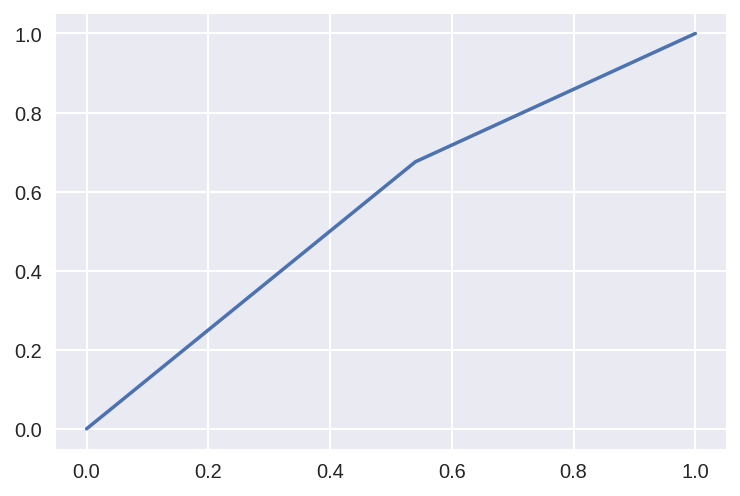

In [36]:
# A:
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1])

### 9. Cross-validate a logistic regression with a Ridge penalty.

Logistic regression can also use the Ridge penalty. Sklearn's `LogisticRegressionCV` class will help you cross-validate an appropriate regularization strength.

**Important `LogisticRegressionCV` arguments:**
- `penalty`: this can be one of `'l1'` or `'l2'`. L1 is the Lasso, and L2 is the Ridge.
- `Cs`: How many different (automatically-selected) regularization strengths should be tested.
- `cv`: How many cross-validation folds should be used to test regularization strength.
- `solver`: When using the lasso penalty, this should be set to `'liblinear'`

> **Note:** The `C` regularization strength is the *inverse* of alpha. That is to say, `C = 1./alpha`

In [37]:
from sklearn.linear_model import LogisticRegressionCV

In [42]:
# A:
lrcv = LogisticRegressionCV(penalty='l2', Cs=1000, cv=5, solver='liblinear')

**9.B Calculate the predicted labels and predicted probabilities on the test set with the Ridge logisitic regression.**

In [43]:
lrcv.fit(X_train, y_train)
y_pred_cv = lrcv.predict(X_test)
y_pred_prob_cv = lrcv.predict_proba(X_test)
y_pred_cv

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1,

In [44]:
# A:
y_pred_prob_cv

array([[ 0.69901418,  0.30098582],
       [ 0.1913654 ,  0.8086346 ],
       [ 0.0662818 ,  0.9337182 ],
       [ 0.49910757,  0.50089243],
       [ 0.69342001,  0.30657999],
       [ 0.49289759,  0.50710241],
       [ 0.23036385,  0.76963615],
       [ 0.22762252,  0.77237748],
       [ 0.73771163,  0.26228837],
       [ 0.20966219,  0.79033781],
       [ 0.54567857,  0.45432143],
       [ 0.52170531,  0.47829469],
       [ 0.30887177,  0.69112823],
       [ 0.63620527,  0.36379473],
       [ 0.85857929,  0.14142071],
       [ 0.6726511 ,  0.3273489 ],
       [ 0.36736802,  0.63263198],
       [ 0.28975903,  0.71024097],
       [ 0.76632243,  0.23367757],
       [ 0.4203506 ,  0.5796494 ],
       [ 0.72934671,  0.27065329],
       [ 0.65135626,  0.34864374],
       [ 0.45597385,  0.54402615],
       [ 0.57233335,  0.42766665],
       [ 0.69050483,  0.30949517],
       [ 0.62973003,  0.37026997],
       [ 0.52952454,  0.47047546],
       [ 0.38157649,  0.61842351],
       [ 0.40978297,

**9.C Construct the confusion matrix for the Ridge LR.**

In [47]:
# A:
tp = np.sum((y_test == 1) & (y_pred_cv == 1))
fp = np.sum((y_test == 0) & (y_pred_cv == 1))
tn = np.sum((y_test == 0) & (y_pred_cv == 0))
fn = np.sum((y_test == 1) & (y_pred_cv == 0))

print(tp, fp, tn, fn)

cm = np.array(confusion_matrix(y_test, y_pred_cv, labels=[1,0]))

confusion = pd.DataFrame(cm, index=['is_male', 'is-female'],
                         columns=['predicted_male', 'predicted_female'])

confusion.T

(177, 123, 101, 88)


,is_male,is-female
predicted_male,177,123
predicted_female,88,101


### 10. Plot the ROC curve for the original and Ridge logistic regressions on the same plot.

Which performs better?

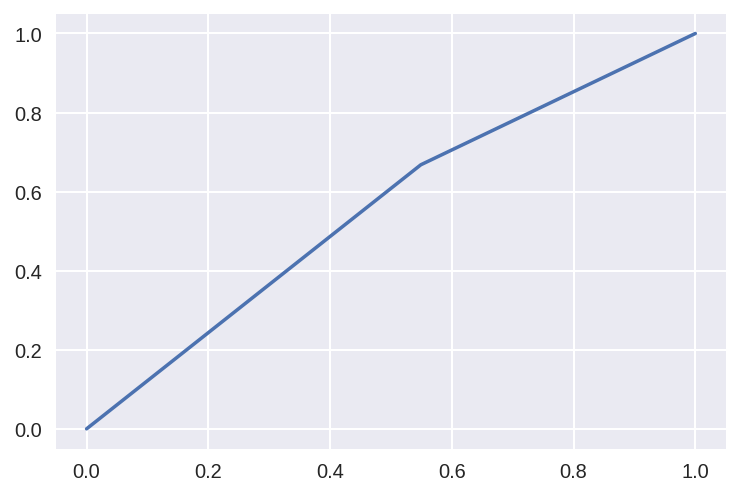

In [48]:
# A:
plt.plot(roc_curve(y_test, y_pred_cv)[0], roc_curve(y_test, y_pred_cv)[1])

### 11. Cross-validate a Lasso logistic regression.

**Remember:**
- `penalty` must be set to `'l1'`
- `solver` must be set to `'liblinear'`

> **Note:** The lasso penalty can be considerably slower. You may want to try fewer Cs or use fewer cv folds.

In [50]:
# A:
lrlas = LogisticRegressionCV(penalty='l1', Cs=1000, cv=5, solver='liblinear')

lrlas.fit(X_train, y_train)
y_pred_las = lrlas.predict(X_test)
y_pred_prob_las = lrlas.predict_proba(X_test)
y_pred_las

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1,

In [51]:
y_pred_prob_las

array([[ 0.69626737,  0.30373263],
       [ 0.22537015,  0.77462985],
       [ 0.07219976,  0.92780024],
       [ 0.48978955,  0.51021045],
       [ 0.64931641,  0.35068359],
       [ 0.59331796,  0.40668204],
       [ 0.28784226,  0.71215774],
       [ 0.23433855,  0.76566145],
       [ 0.7347407 ,  0.2652593 ],
       [ 0.20568478,  0.79431522],
       [ 0.51949254,  0.48050746],
       [ 0.52459836,  0.47540164],
       [ 0.39122619,  0.60877381],
       [ 0.6568912 ,  0.3431088 ],
       [ 0.7929358 ,  0.2070642 ],
       [ 0.63700518,  0.36299482],
       [ 0.38375685,  0.61624315],
       [ 0.31275909,  0.68724091],
       [ 0.73378253,  0.26621747],
       [ 0.44075417,  0.55924583],
       [ 0.64588112,  0.35411888],
       [ 0.63222797,  0.36777203],
       [ 0.44663437,  0.55336563],
       [ 0.56257528,  0.43742472],
       [ 0.63436816,  0.36563184],
       [ 0.52204209,  0.47795791],
       [ 0.58213175,  0.41786825],
       [ 0.46113971,  0.53886029],
       [ 0.41127004,

### 12. Make the confusion matrix for the Lasso model.

In [52]:
# A:
tp = np.sum((y_test == 1) & (y_pred_las == 1))
fp = np.sum((y_test == 0) & (y_pred_las == 1))
tn = np.sum((y_test == 0) & (y_pred_las == 0))
fn = np.sum((y_test == 1) & (y_pred_las == 0))

print(tp, fp, tn, fn)

cm = np.array(confusion_matrix(y_test, y_pred_las, labels=[1,0]))

confusion = pd.DataFrame(cm, index=['is_male', 'is-female'],
                         columns=['predicted_male', 'predicted_female'])

confusion.T

(173, 116, 108, 92)


,is_male,is-female
predicted_male,173,116
predicted_female,92,108


### 13. Plot all three logistic regression models on the same ROC plot.

Which is the best? (if any)

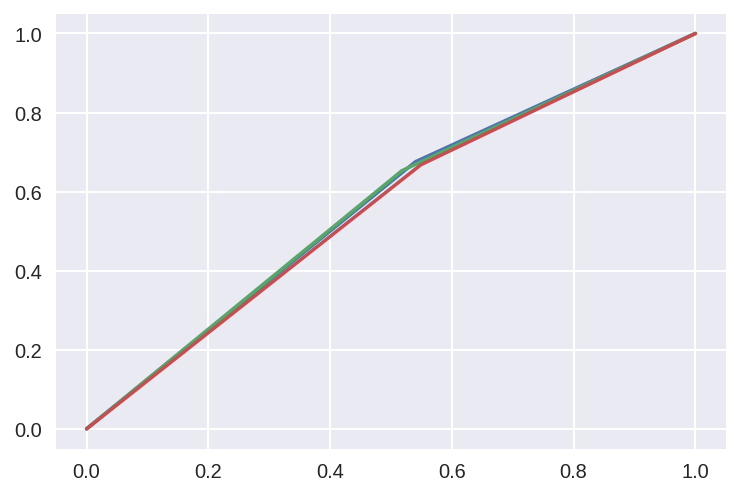

In [55]:
# A:
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1])
plt.plot(roc_curve(y_test, y_pred_las)[0], roc_curve(y_test, y_pred_las)[1])
plt.plot(roc_curve(y_test, y_pred_cv)[0], roc_curve(y_test, y_pred_cv)[1])

In [ ]:
#
# Tiny differences: what have I done wrong, does not make sense.
#


### 14. Look at the coefficients for the Lasso logistic regression model. Which variables are the most important?

In [56]:
# A:
lrlas.coef_

array([[ 0.1130154 , -0.03709498,  0.        ,  0.11561946,  0.        ,
         0.        , -0.11528966,  0.        ,  0.05162207,  0.        ,
         0.31716866,  0.26485467,  0.        ,  0.        , -0.34933631,
         0.22046712, -0.02812426, -0.02615909,  0.        ,  0.0122837 ,
         0.02033553,  0.06070757,  0.        ,  0.        ,  0.        ,
         0.06985569,  0.00614082, -0.03866822, -0.10619594, -0.15125897,
         0.        ,  0.        ,  0.1690408 ,  0.08215777]])

In [62]:
np.sort(map(abs,lrlas.coef_))

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.00614082,  0.0122837 ,
         0.02033553,  0.02615909,  0.02812426,  0.03709498,  0.03866822,
         0.05162207,  0.06070757,  0.06985569,  0.08215777,  0.10619594,
         0.1130154 ,  0.11528966,  0.11561946,  0.15125897,  0.1690408 ,
         0.22046712,  0.26485467,  0.31716866,  0.34933631]])